In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mat

In [6]:
new_data = pd.read_csv("watson_20180712.dsv")

In [7]:
data = new_data[['A_MSISDN','PROCESSED_DATE_TIME','DEBIT_CREDIT','REASON_FOR_DEBIT_CREDIT','OPEN_BAL','AMOUNT','CLOSE_BAL','SMS_DISCOUNT_FACTOR','UNIT_OF_MEASURE']]

In [8]:
new = data.loc[data['DEBIT_CREDIT'] == 'C']

In [214]:
prep = new.loc[new['UNIT_OF_MEASURE'] == 'Points']

In [215]:
prep['PROCESSED_DATE_TIME'] = pd.to_datetime(prep['PROCESSED_DATE_TIME'])

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [17]:
def group(value):
    if ((value > pd.to_datetime('2018-07-12 00:00:00', format='%Y-%m-%d %H:%M:%S.%f')) 
            and (value < pd.to_datetime('2018-07-12 04:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return '00:00:00-03:59:59'
    elif ((value > pd.to_datetime('2018-07-12 03:59:59', format='%Y-%m-%d %H:%M:%S.%f')) 
             and (value < pd.to_datetime('2018-07-12 11:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return '04:00:00-10:59:59'
    elif ((value > pd.to_datetime('2018-07-12 10:59:59', format='%Y-%m-%d %H:%M:%S.%f')) 
            and (value < pd.to_datetime('2018-07-12 15:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return '11:00:00-14:59:59'
    elif ((value > pd.to_datetime('2018-07-12 14:59:59', format='%Y-%m-%d %H:%M:%S.%f')) 
             and (value < pd.to_datetime('2018-07-12 18:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return '15:00:00-17:59:59'
    else:
        return '18:00:00-23:59:59'

In [18]:
prep['Times'] = prep['PROCESSED_DATE_TIME'].apply(group)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Times',data=prep,palette='RdBu_r')

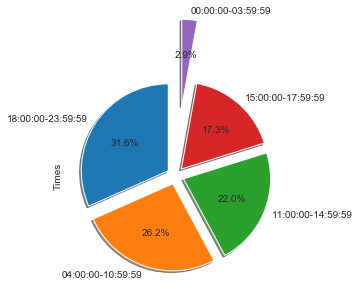

In [20]:
explode = (0.1, 0.1, 0.1, 0.1, 0.8)

prep['Times'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)

mat.gca().set_aspect('equal')

In [217]:
def times(value):
    if ((value > pd.to_datetime('2018-07-12 00:00:00', format='%Y-%m-%d %H:%M:%S.%f')) 
            and (value < pd.to_datetime('2018-07-12 04:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return 'nighttime'
    elif ((value > pd.to_datetime('2018-07-12 03:59:59', format='%Y-%m-%d %H:%M:%S.%f')) 
             and (value < pd.to_datetime('2018-07-12 11:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return 'morning'
    elif ((value > pd.to_datetime('2018-07-12 10:59:59', format='%Y-%m-%d %H:%M:%S.%f')) 
            and (value < pd.to_datetime('2018-07-12 15:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return 'midday'
    elif ((value > pd.to_datetime('2018-07-12 14:59:59', format='%Y-%m-%d %H:%M:%S.%f')) 
             and (value < pd.to_datetime('2018-07-12 18:00:00', format='%Y-%m-%d %H:%M:%S.%f'))):
        return 'afternoon'
    else:
        return 'evennig'

In [218]:
prep['GROUPS'] = prep['PROCESSED_DATE_TIME'].apply(times)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


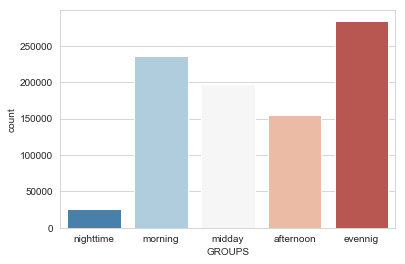

In [219]:
sns.set_style('whitegrid')
sns.countplot(x='GROUPS',data=prep,palette='RdBu_r')

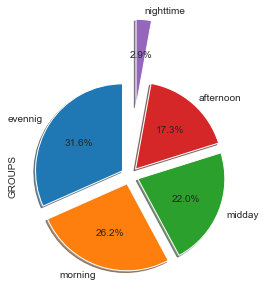

In [220]:
explode = (0.1, 0.1, 0.1, 0.1, 0.8)

prep['GROUPS'].value_counts().plot.pie(autopct='%1.1f%%',explode=explode, shadow=True, startangle=90)

mat.gca().set_aspect('equal')

In [52]:
nighttime = prep.loc[prep['GROUPS'] == 'nighttime']

In [32]:
a = nighttime['REASON_FOR_DEBIT_CREDIT'].value_counts()

In [33]:
a_1 = pd.DataFrame(data=[a]).T

In [43]:
a_1.to_csv('nighttime.csv')

In [53]:
morning = prep.loc[prep['GROUPS'] == 'morning']

In [34]:
b = morning['REASON_FOR_DEBIT_CREDIT'].value_counts()

In [35]:
b_1 = pd.DataFrame(data=[b]).T

In [44]:
b_1.to_csv('morning.csv')

In [54]:
midday = prep.loc[prep['GROUPS'] == 'midday']

In [36]:
c = midday['REASON_FOR_DEBIT_CREDIT'].value_counts()

In [37]:
c_1 = pd.DataFrame(data=[c]).T

In [45]:
c_1.to_csv('midday.csv')

In [55]:
afternoon = prep.loc[prep['GROUPS'] == 'afternoon']

In [38]:
d = afternoon['REASON_FOR_DEBIT_CREDIT'].value_counts()

In [39]:
d_1 = pd.DataFrame(data=[d]).T

In [46]:
d_1.to_csv('afternoon.csv')

In [56]:
evenning = prep.loc[prep['GROUPS'] == 'evenning']

In [41]:
e = evenning['REASON_FOR_DEBIT_CREDIT'].value_counts()

In [42]:
e_1 = pd.DataFrame(data=[e]).T

In [47]:
e_1.to_csv('evenning.csv')

In [ ]:
prep['REASON_FOR_DEBIT_CREDIT'].value_counts()

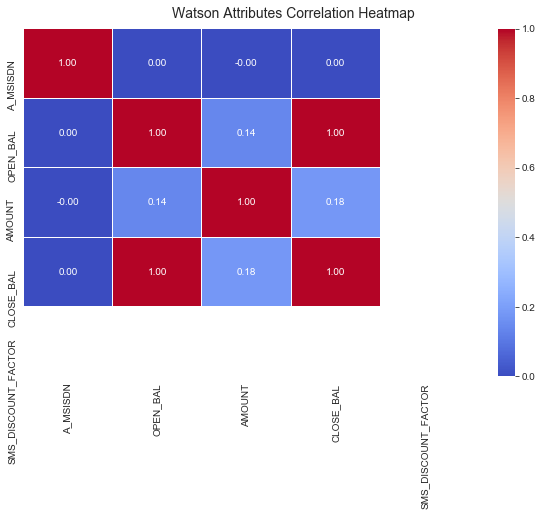

In [60]:
f, ax = mat.subplots(figsize=(10, 6))
corr = prep.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Watson Attributes Correlation Heatmap', fontsize=14)

In [75]:
def f(phrase):
    for i in phrase:
        if any(i in 'MB'):
            return 'Data'


In [81]:
any(i in '22' for i in ('11','22','33'))

True

In [62]:
pattern = re.compile(r'\d\$,'):
    if pattern.findall(s):
        print('Found')
    else:
        print('Not found')

SyntaxError: invalid syntax (<ipython-input-62-52ee875063fc>, line 1)

In [93]:
def func():
    data = 'data'
    for i in data.split():
        if i == 'a':
            return data
    print(data)


    

In [192]:
dr = prep.head()

In [193]:
dr

,A_MSISDN,PROCESSED_DATE_TIME,DEBIT_CREDIT,REASON_FOR_DEBIT_CREDIT,OPEN_BAL,AMOUNT,CLOSE_BAL,SMS_DISCOUNT_FACTOR,UNIT_OF_MEASURE,Times,GROUPS
1,1897346930,2018-07-12 00:43:00,C,XT1D50MB,119.0,8.0,127.0,0,Points,00:00:00-03:59:59,nighttime
5,3088462933,2018-07-12 00:51:51,C,Provision,79.0,17.0,96.0,0,Points,00:00:00-03:59:59,nighttime
7,4032303379,2018-07-12 00:48:19,C,XT1D20MB,601.0,4.0,605.0,0,Points,00:00:00-03:59:59,nighttime
8,3741909190,2018-07-12 00:48:30,C,Provision,75.0,29.0,104.0,0,Points,00:00:00-03:59:59,nighttime
13,344542536,2018-07-12 00:48:26,C,XT1D20MB,231.0,4.0,235.0,0,Points,00:00:00-03:59:59,nighttime


In [95]:
def dataMB(value):
    let = 'BDAP3G'
    val = value.find(let)
    if (val != -1):
        return 'Data'
    else:
        return value

In [122]:
def dataGB(value):
    let = 'SMAC'
    val = value.find(let)
    if (val != -1):
        return 'Other'
    else:
        return value

In [97]:
def voice(value):
    let = 'Airtime'
    val = value.find(let)
    if (val != -1):
        return 'Other'
    else:
        return value

In [123]:
prep['REASON_FOR_DEBIT_CREDIT'] = prep['REASON_FOR_DEBIT_CREDIT'].apply(dataGB)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [124]:
prep['REASON_FOR_DEBIT_CREDIT'].unique()

array(['Data', 'Provision', 'Voice', 'PPMED', 'ReProvision', 'ODNX250',
       'WIA', '1DAY', 'WIR', 'Me2UPrepaid', 'SMS', 'Other'], dtype=object)

In [125]:
prep['REASON_FOR_DEBIT_CREDIT'].value_counts()

Provision      294191
Data           262255
Voice          202703
WIA             64235
PPMED           50484
WIR              6451
1DAY             5642
ODNX250          3787
SMS              3227
Other            2444
Me2UPrepaid      2439
ReProvision      1039
Name: REASON_FOR_DEBIT_CREDIT, dtype: int64

In [143]:
loy_trans = d[d['REASON_FOR_DEBIT_CREDIT'].str.slice(0, 3) == 'LOY'].head()

array(['Data'], dtype=object)

In [272]:
t = new_data[['DEBIT_CREDIT','REASON_FOR_DEBIT_CREDIT','OPEN_BAL','AMOUNT','CLOSE_BAL','UNIT_OF_MEASURE']]

In [298]:
w = t.loc[t['REASON_FOR_DEBIT_CREDIT'] == 'ReProvision']

In [288]:
w['UNIT_OF_MEASURE'].unique()

array(['Points'], dtype=object)

In [ ]:
w.loc[w['UNIT_OF_MEASURE']=='']

In [ ]:
t.loc[t['UNIT_OF_MEASURE'] == 'Units']

In [131]:

prep.to_csv('Prep.csv')

In [204]:
dom = pd.get_dummies(prep['REASON_FOR_DEBIT_CREDIT'])

In [207]:
dom['Other'].value_counts()

0    464958
1      2444
Name: Other, dtype: int64

In [183]:
dob.drop('REASON_FOR_DEBIT_CREDIT',axis=1,inplace=True)

/Users/academy_intern/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [184]:
nop = pd.concat([dob,dom], axis = 1)

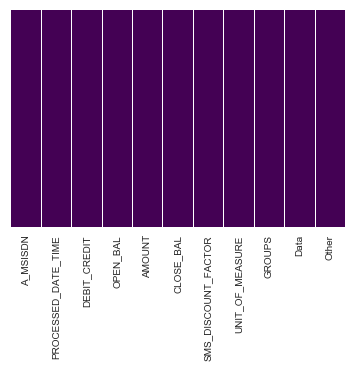

In [139]:
sns.heatmap(nop.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [140]:
from sklearn.model_selection import train_test_split

In [145]:
#x = nop[['Data','AMOUNT']]

In [190]:
X_train, X_test, y_train, y_test = train_test_split(nop.drop(['Data','A_MSISDN','PROCESSED_DATE_TIME','DEBIT_CREDIT','UNIT_OF_MEASURE','SMS_DISCOUNT_FACTOR','GROUPS'], axis=1), 
                                                    nop['Other'], test_size=0.50)

In [142]:
from sklearn.linear_model import LogisticRegression

In [191]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [192]:
predictions = logmodel.predict(X_test)

In [188]:
from sklearn.metrics import classification_report

In [193]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.99      1.00      1.00    232512
          1       0.33      0.00      0.00      1189

avg / total       0.99      0.99      0.99    233701



In [213]:
arr = [1,2,3,4,5]
print(min(arr),max(arr))

1 5


In [209]:
arr

[1, 2, 3, 4, 5]